Atlanta has the most damages. Having multiple entries in the top 10

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import wrangle as w
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [260]:
df1= w.acquire()
df1= w.prep(df1)

In [261]:
df= w.get_cws_data()

In [262]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [263]:
def states(val):
    '''
    This funciton takes in a column of values and uses a previously established property key to 
    convert each property id into the name of the state in which the property resides
    '''
    if val in range(53,116) or val in range(152,159) or val in [198,218,229,252,440,441,442,458]:
        return 'Texas'
    elif val in range(116,124) or val in [159, 444]:
        return 'North Carolina'
    elif val in range(125,131) or val in [164,183,212,213,217, 253]:
        return 'Colorado'
    elif val in range(142,147) or val in [216]:
        return 'Arizona'
    elif val == 131:
        return 'California'
    elif val in range(132,142) or val in [385,443,459]:
        return 'Georgia'
    elif val in [277,280]:
        return 'Tennessee'
    elif val in range(147,152) or val in [160,161,162,163]:
        return 'Washington'

In [264]:
train.prop_id = train.prop_id.apply(states)

In [265]:
train

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2505,63279,6.00,6.00,0,190,Pest control (01/2023),Texas,Pest control,Current,1679,4,14083,False,241992,Accept,45,648,Meets All Property Requirements,0
1262,45474,1479.00,1479.00,0,74,Rent (02/2023),Colorado,Rent,Current,1479,18,4095,True,49140,Accept with Conditions (Guarantor),34,561,Severe level of Charge-offs,0
2542,63383,4.00,4.00,0,190,Pest control (02/2023),Texas,Pest control,Current,1269,12,3308,True,0,Accept with Conditions (Guarantor),40,632,Insufficient Income to Support Rent,0
730,31765,0.90,0.90,0,128,Valet Waste for 1 days,Georgia,Trash service fee,Current,1689,12,1906,True,0,Accept with Conditions (Guarantor),27,771,Insufficient Income to Support Rent,0
3048,64923,5.00,5.00,0,191,Amenity fee (02/2023),North Carolina,Amenity fee,Current,1409,18,6250,False,96732,Accept with Conditions (Extra Deposit),33,0,No Credit Experience,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,68290,16.67,16.67,0,128,Valet Trash for 20 days,Texas,Trash service fee,Current,1759,13,4750,False,224592,Accept with Conditions (Max Deposit),38,613,Severe level of Judgments/Suits OR Repossessio...,0
4452,70784,3.00,0.00,-1,190,Pest control (03/2023),Texas,Pest control,Current,1319,13,3200,True,41268,Accept with Conditions (Guarantor),28,548,Insufficient Income to Support Rent,0
1063,33589,239.83,239.83,0,74,Rent for 5 days,Texas,Rent,Current,1439,12,5222,False,113292,Accept,28,747,No Credit Experience,0
3145,65242,0.38,0.38,0,112,Utility-water charges for 12 Days,Texas,Utility-water charges,Current,1589,12,5500,False,152760,Accept,53,722,Limited period of Employment History,0


In [266]:
def get_common(df1):
    
    '''
    This functions filters out the negative charge codes, then gets the top six of those codes.
    It then returns a plot to show the results. 
    '''
    
    # negative charge codes
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    
    # top six negative charge codes
    six= [298, 105, 155, 154, 156, 131]
    
    # create new df using negative charge codes
    bad_df= df1[df1['charge_code'].isin(cc)]
    
    # create new df using the top six negative charge codes
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    
    #plotting the results of the function
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red']
    ax = sns.countplot(
                     data= six_df , x= 'charge_code', palette= color,
                     ec= 'black')
    for i in ax.containers:
            ax.bar_label(i,)
    

Takeaways:

Here we can see that Charge Code `298` is the most common, by a huge margine. 

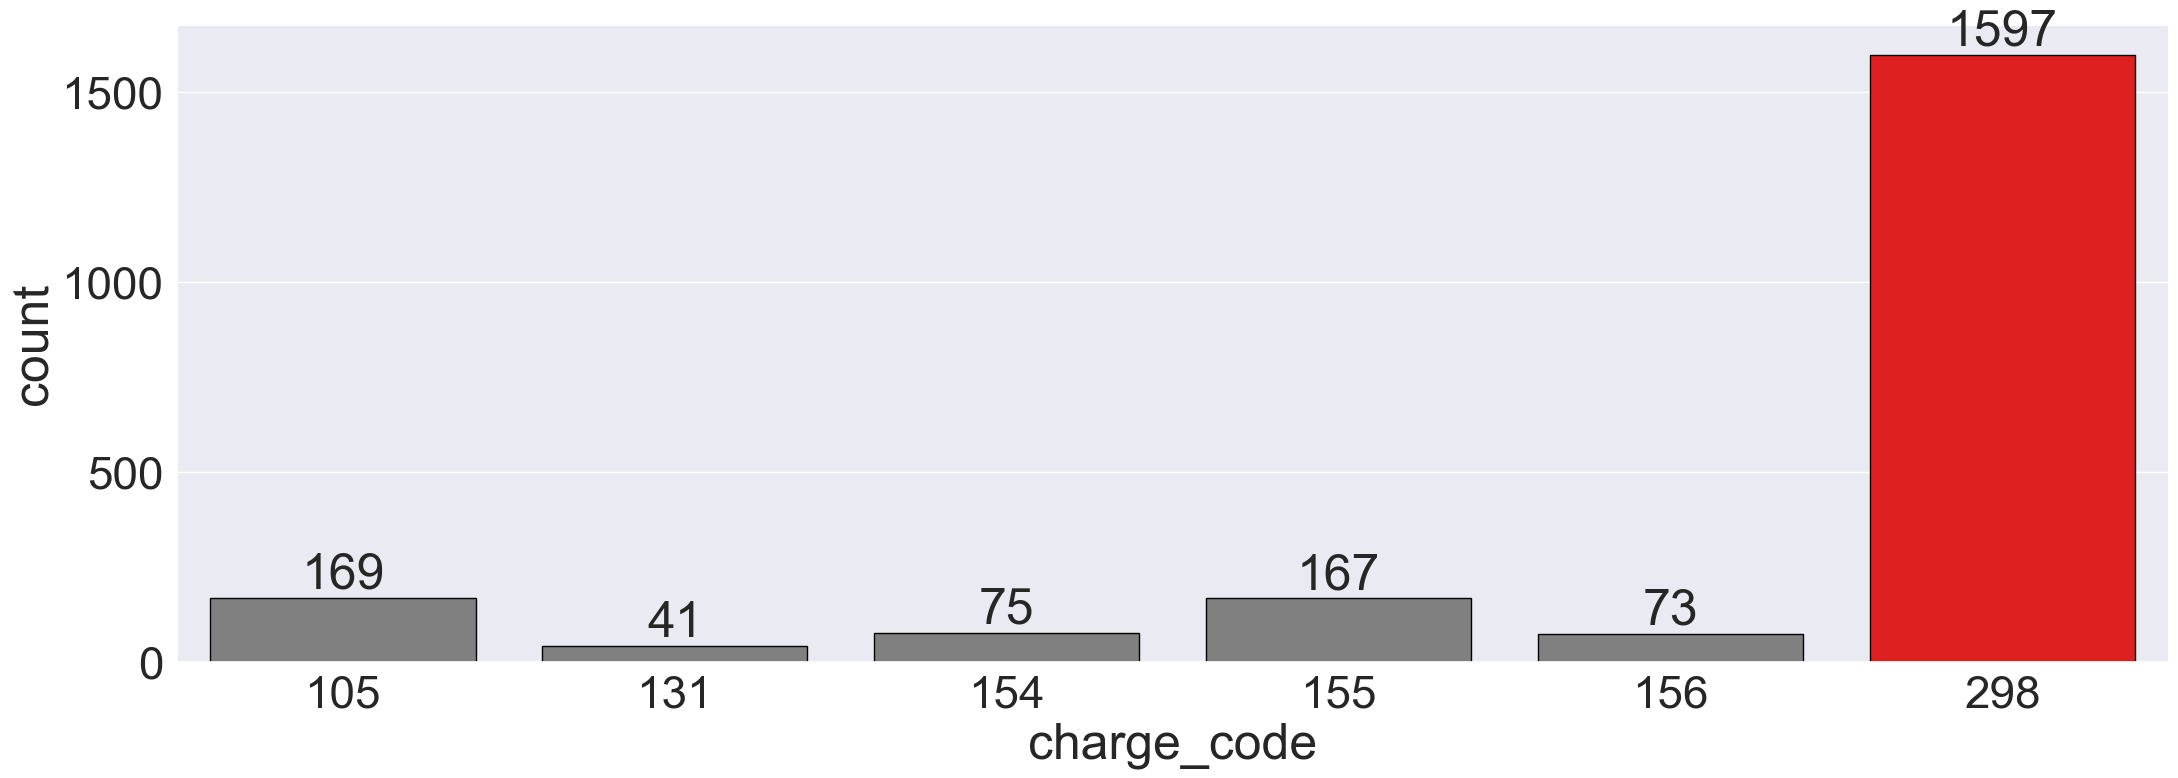

In [269]:
get_common(df1)

In [274]:
def bad_properties(train):
    
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    six= [298, 105, 155, 154, 156, 131]
    
    bad_properties= train[train['charge_code'].isin(cc)]
    df3= bad_properties.groupby('prop_id')['charge_code'].count().nlargest(10)
    df3= pd.DataFrame({'most_common': df3})
    df3= df3.reset_index()
    return df3

In [276]:
df3= bad_properties(train)

In [338]:
def plot_bad_properties(df3):
    color= ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
    fig = plt.figure()
    ax= sns.barplot(data= df3, x= 'prop_id', y= 'most_common', palette= color,  errwidth=0, ec= 'black')
    sns.set(rc={'figure.figsize':(39.7,18.27)})
    sns.set(font_scale= 4.5)
    plt.xlabel('Property ID')
    plt.ylabel('Charge Code Count')
    plt.title('Properties With The Most Damage Codes')
    for i in ax.containers:
            ax.bar_label(i,)
    plt.show()

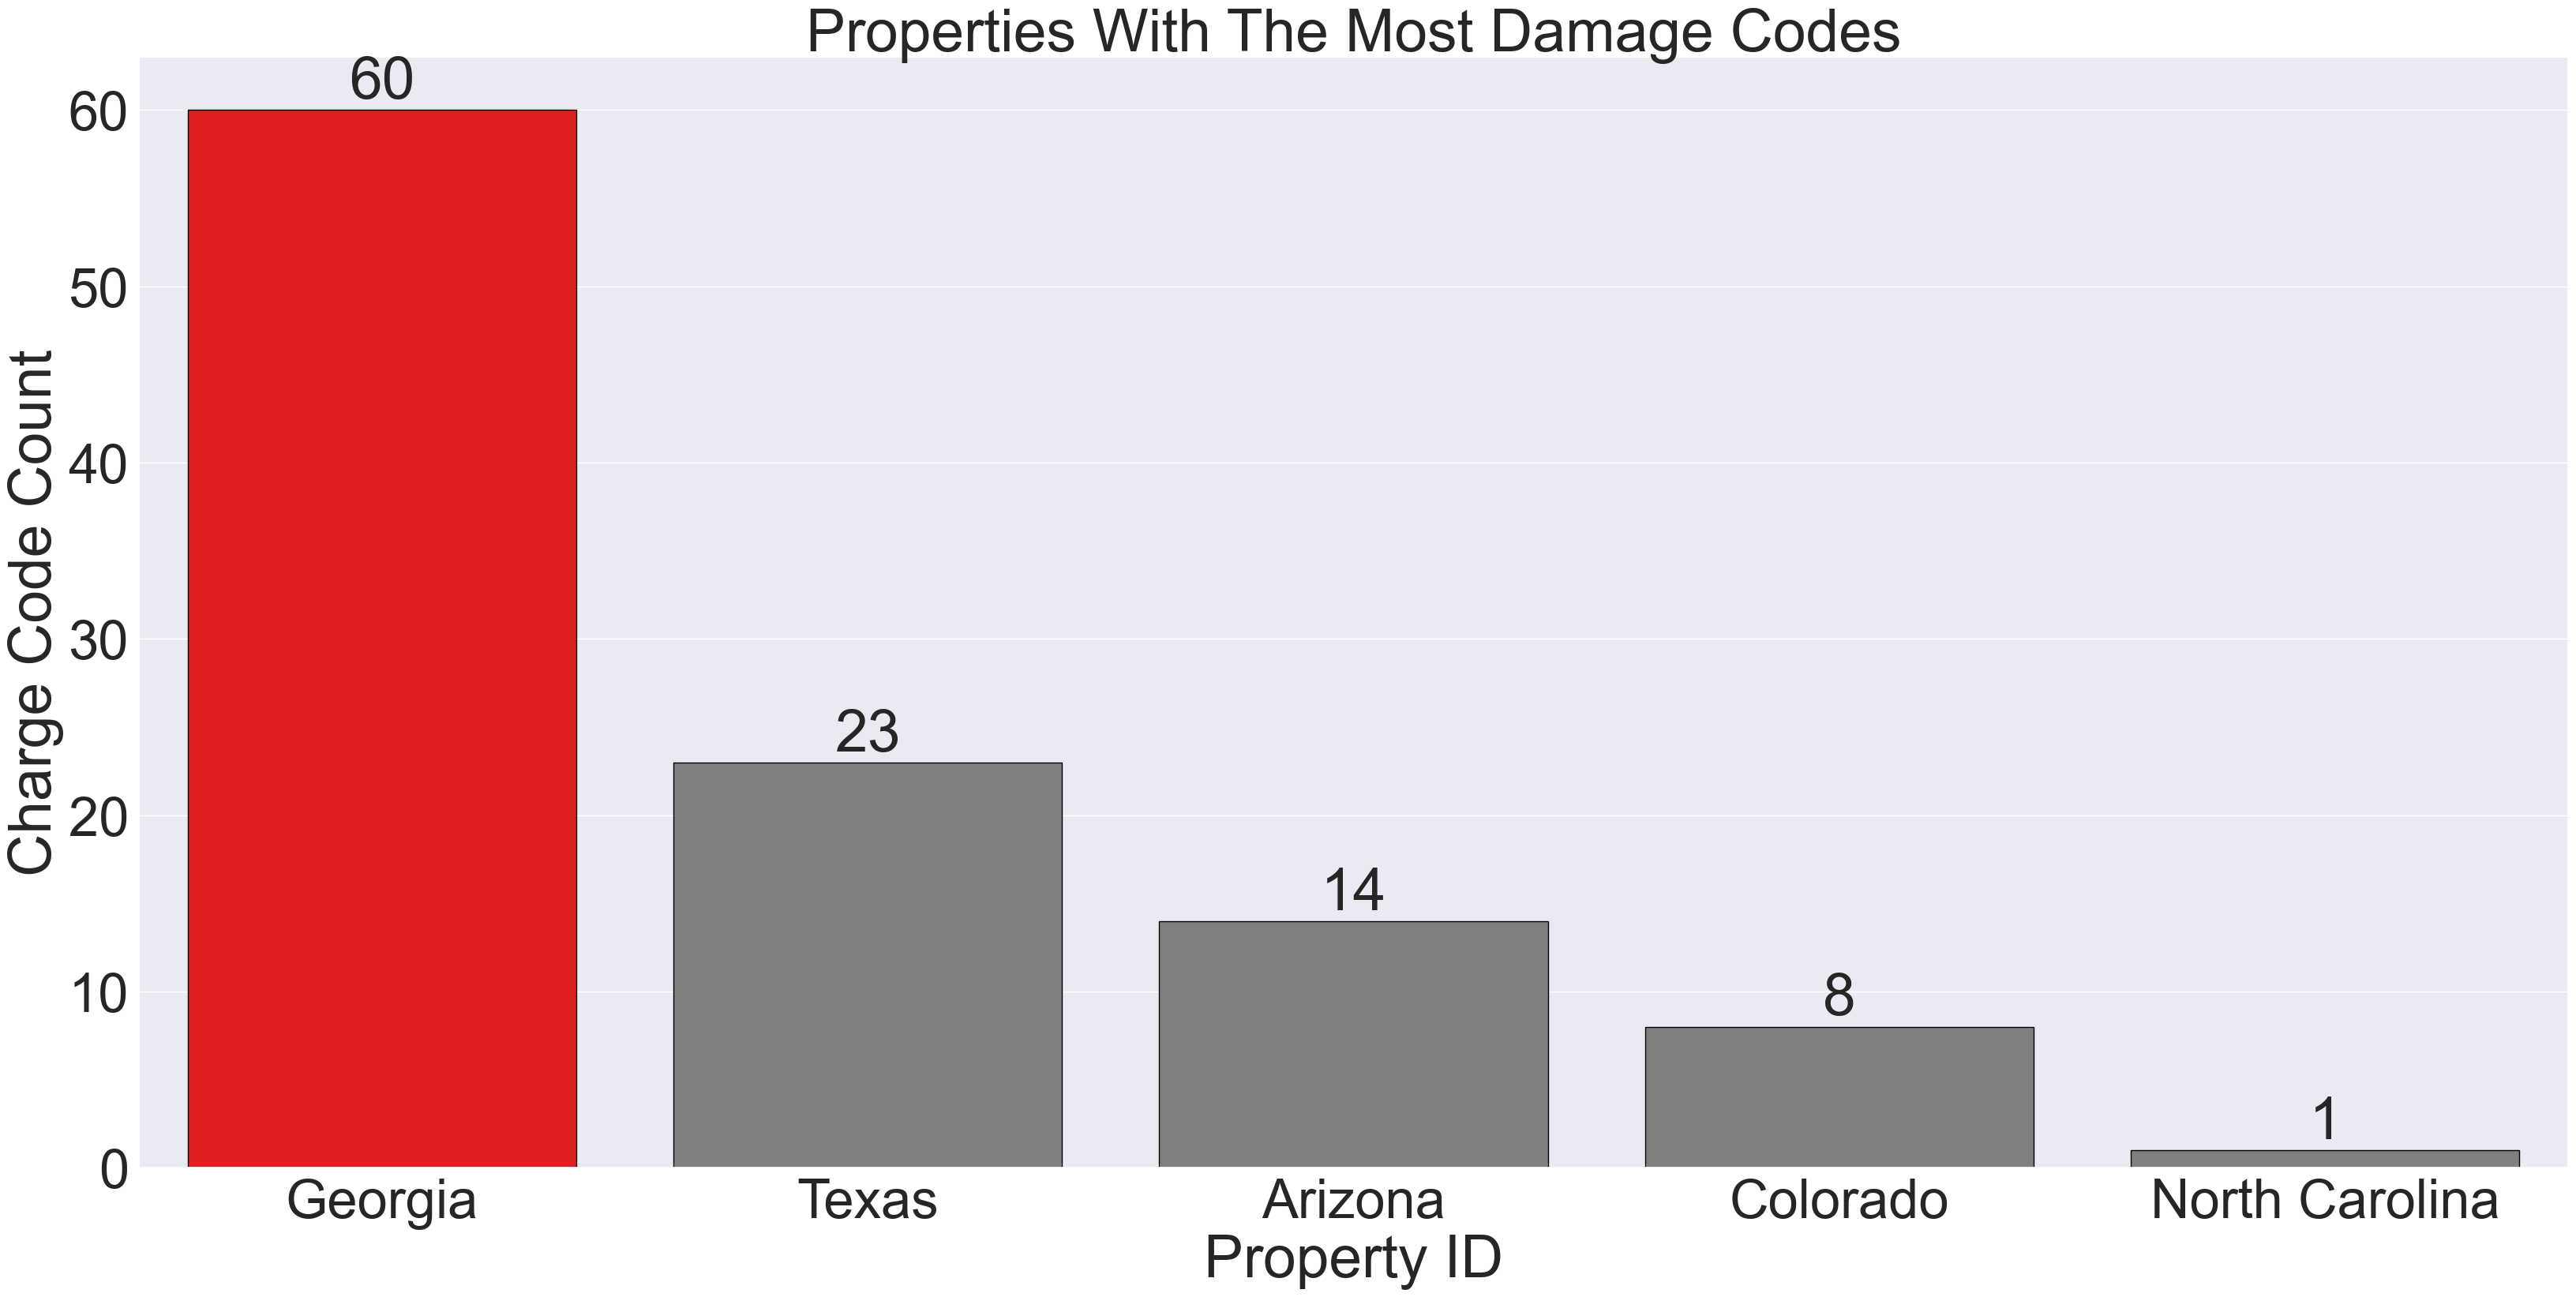

In [339]:
plot_bad_properties(df3)

In [15]:
bad_df= df1[df1['charge_code'].isin(cc)]

In [17]:
six= [298, 105, 155, 154, 156, 131]

In [18]:
six_df= bad_df[bad_df['charge_code'].isin(six)]

In [124]:
bad_df2= train[train['charge_code'].isin(cc)]

In [167]:
bad_df.groupby('property_id')['charge_code'].count().nlargest(10)

property_id
136    736
137    629
216    215
140    105
67      51
73      50
135     48
70      36
142     25
57      24
Name: charge_code, dtype: int64

In [132]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [163]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
prop_group= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [165]:
prop_group.bad_resident.mean()

1.0